## Imports

In [1]:
import pandas as pd

import numpy as np

from nilearn import plotting
from nilearn.glm.first_level import FirstLevelModel
from nilearn.glm.second_level import SecondLevelModel
from nilearn.image import threshold_img
from nilearn.glm import threshold_stats_img
from nilearn import surface
from nilearn import datasets
from nilearn.reporting import get_clusters_table
from nilearn.image import resample_to_img
from nilearn.input_data import NiftiMasker, NiftiLabelsMasker
#from nilearn.maskers import NiftiLabelsMasker

import glob

from natsort import natsorted

import matplotlib.pyplot as plt

/home/dgd45125/.local/lib/python3.7/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [3]:
import nilearn
print(nilearn.__version__)

0.9.1


/home/dgd45125/.local/lib/python3.7/site-packages/nilearn/image/image.py:756: FutureWarning: Image data has type int64, which may cause incompatibilities with other tools. This will error in NiBabel 5.0. This warning can be silenced by passing the dtype argument to Nifti1Image().
  return klass(data, affine, header=header)
/home/dgd45125/.local/lib/python3.7/site-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


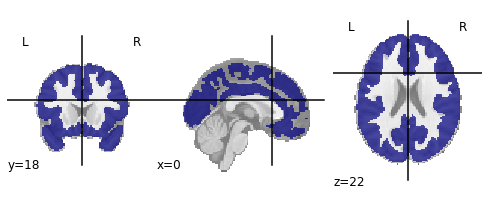

In [2]:
sample = './openNeuro_LPP/english/subj057/section15.nii.gz'

Yeo = 'Yeo_JNeurophysiol11_MNI152/Yeo2011_7Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz'
resampled_Yeo = resample_to_img(source_img=Yeo, target_img=sample,interpolation='nearest')

#plotting.plot_roi(resampled_Yeo,cut_coords=(-0,18,22))

parcelation_masker = NiftiLabelsMasker(labels_img=resampled_Yeo)
time_series = parcelation_masker.fit_transform(sample)

resampled_yeo_binary = parcelation_masker.inverse_transform([[1,1,1,1,1,1,1]])
plotting.plot_roi(resampled_yeo_binary,cut_coords=(0,18,22))

# WH

## Chinese

In [3]:
#natsorted(glob.glob(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/chinese/*WH_eff*"))

In [4]:
chinese_WH_files = natsorted(glob.glob(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/chinese/*WH_eff*"))
design_matrix = pd.DataFrame([1] * len(chinese_WH_files), columns=['intercept'])

chinese_WH_model = SecondLevelModel(smoothing_fwhm=8.0,
                            mask_img=resampled_yeo_binary)
chinese_WH_model = chinese_WH_model.fit(chinese_WH_files, design_matrix=design_matrix)

chinese_WH_map = chinese_WH_model.compute_contrast(output_type='z_score')

/home/dgd45125/.local/lib/python3.7/site-packages/nilearn/image/image.py:756: FutureWarning: Image data has type int64, which may cause incompatibilities with other tools. This will error in NiBabel 5.0. This warning can be silenced by passing the dtype argument to Nifti1Image().
  return klass(data, affine, header=header)


2.996101506588129


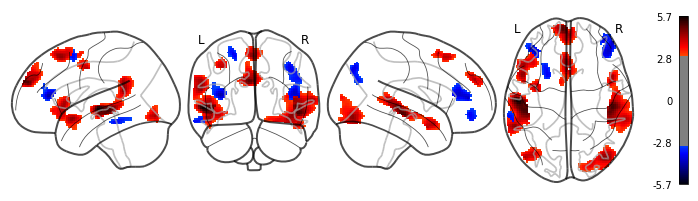

In [5]:
chinese_WH_thresholded, chinese_WH_threshold = threshold_stats_img(chinese_WH_map, alpha=.05, 
                                                             height_control = 'fdr',
                                                             two_sided=True,
                                                             cluster_threshold=100)
print(chinese_WH_threshold)
plotting.plot_glass_brain(chinese_WH_thresholded,plot_abs=False, 
                          threshold = chinese_WH_threshold,
                          display_mode='lyrz',
                          colorbar=True)

In [6]:
#chinese_WH_thresholded.to_filename('second_level/chinese_WH_thresholded.nii.gz')

In [47]:
table = get_clusters_table(stat_img = chinese_WH_thresholded,
                           stat_threshold=chinese_WH_threshold,
                           two_sided=True)

table = table.round({'X':0,'Y':0,'Z':0,'Peak Stat':2})
table.drop(columns='Cluster ID',inplace=True)
table=table[['Cluster Size (mm3)','X','Y','Z','Peak Stat']]
table

,Cluster Size (mm3),X,Y,Z,Peak Stat
0,10056,-56.0,-18.0,-4.0,5.66
1,,-46.0,-28.0,-6.0,5.16
2,,-60.0,-46.0,18.0,4.61
3,11168,50.0,-24.0,-10.0,5.16
4,,46.0,-30.0,-2.0,4.92
5,,44.0,-40.0,4.0,4.47
6,,50.0,10.0,-20.0,4.31
7,4192,-6.0,64.0,26.0,5.00
8,6032,-52.0,12.0,-14.0,4.54
9,,-50.0,24.0,-2.0,4.34


In [45]:
print(table.to_latex())

\begin{tabular}{llrrrr}
\toprule
{} & Cluster Size (mm3) &     X &     Y &     Z &  Peak Stat \\
\midrule
0  &              10056 & -56.0 & -18.0 &  -4.0 &       5.66 \\
1  &                    & -46.0 & -28.0 &  -6.0 &       5.16 \\
2  &                    & -60.0 & -46.0 &  18.0 &       4.61 \\
3  &              11168 &  50.0 & -24.0 & -10.0 &       5.16 \\
4  &                    &  46.0 & -30.0 &  -2.0 &       4.92 \\
5  &                    &  44.0 & -40.0 &   4.0 &       4.47 \\
6  &                    &  50.0 &  10.0 & -20.0 &       4.31 \\
7  &               4192 &  -6.0 &  64.0 &  26.0 &       5.00 \\
8  &               6032 & -52.0 &  12.0 & -14.0 &       4.54 \\
9  &                    & -50.0 &  24.0 &  -2.0 &       4.34 \\
10 &                    & -40.0 &  26.0 & -10.0 &       3.86 \\
11 &                    & -40.0 &  34.0 &  -6.0 &       3.63 \\
12 &               6856 &  40.0 & -80.0 & -14.0 &       4.53 \\
13 &                    &  26.0 & -88.0 & -18.0 &       3.86 \

## English

In [6]:
english_WH_files = natsorted(glob.glob(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/english/*WH_eff*"))
design_matrix = pd.DataFrame([1] * len(english_WH_files), columns=['intercept'])

english_WH_model = SecondLevelModel(mask_img=resampled_yeo_binary,
                         smoothing_fwhm=8.0)
english_WH_model = english_WH_model.fit(english_WH_files, design_matrix=design_matrix)

english_WH_map = english_WH_model.compute_contrast(output_type='z_score')

3.0948416414035975


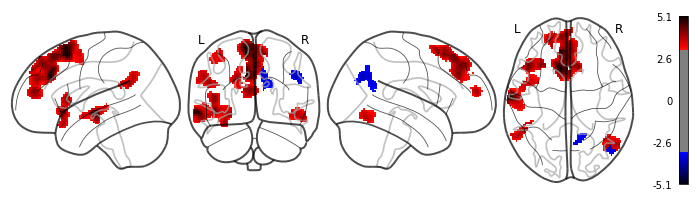

In [7]:
english_WH_thresholded, english_WH_threshold = threshold_stats_img(english_WH_map, alpha=.05, 
                                                             height_control = 'fdr',
                                                             two_sided=True,
                                                             cluster_threshold=100)
print(english_WH_threshold)

plotting.plot_glass_brain(english_WH_thresholded,plot_abs=False, 
                          threshold = english_WH_threshold,
                          display_mode='lyrz',
                          colorbar=True)

In [16]:
#english_WH_thresholded.to_filename('second_level/english_WH_thresholded.nii.gz')

In [48]:
table = get_clusters_table(stat_img = english_WH_thresholded,stat_threshold=english_WH_threshold,two_sided=True)

table = table.round({'X':0,'Y':0,'Z':0,'Peak Stat':2})
table.drop(columns='Cluster ID',inplace=True)
table=table[['Cluster Size (mm3)','X','Y','Z','Peak Stat']]
table

,Cluster Size (mm3),X,Y,Z,Peak Stat
0,15664,-8.0,18.0,58.0,5.14
1,,-10.0,36.0,32.0,5.09
2,,-2.0,32.0,54.0,4.52
3,,12.0,22.0,56.0,4.34
4,3720,-64.0,-14.0,-8.0,4.98
5,,-50.0,-2.0,-10.0,3.79
6,4824,-44.0,22.0,-6.0,4.39
7,,-44.0,18.0,6.0,4.22
8,,-28.0,24.0,-12.0,4.21
9,,-32.0,22.0,-20.0,3.93


In [51]:
print(table.to_latex())

\begin{tabular}{llrrrr}
\toprule
{} & Cluster Size (mm3) &     X &     Y &     Z &  Peak Stat \\
\midrule
0  &              15664 &  -8.0 &  18.0 &  58.0 &       5.14 \\
1  &                    & -10.0 &  36.0 &  32.0 &       5.09 \\
2  &                    &  -2.0 &  32.0 &  54.0 &       4.52 \\
3  &                    &  12.0 &  22.0 &  56.0 &       4.34 \\
4  &               3720 & -64.0 & -14.0 &  -8.0 &       4.98 \\
5  &                    & -50.0 &  -2.0 & -10.0 &       3.79 \\
6  &               4824 & -44.0 &  22.0 &  -6.0 &       4.39 \\
7  &                    & -44.0 &  18.0 &   6.0 &       4.22 \\
8  &                    & -28.0 &  24.0 & -12.0 &       4.21 \\
9  &                    & -32.0 &  22.0 & -20.0 &       3.93 \\
10 &               2552 &  -4.0 &  56.0 &  16.0 &       4.22 \\
11 &               2088 & -50.0 & -50.0 &  24.0 &       4.06 \\
12 &                    & -42.0 & -42.0 &  22.0 &       3.78 \\
13 &               2392 & -22.0 &  50.0 &  30.0 &       4.03 \

## Intersection

In [ ]:
masker = NiftiMasker(resampled_yeo_binary)

english_WH_array = masker.fit_transform(english_WH_map)
chinese_WH_array = masker.fit_transform(chinese_WH_map)

intersection = []
count = 0
for i in range(len(english_WH_array[0])):
    if (english_WH_array[0][i] > 3.0948416414035975) and (chinese_WH_array[0][i] > 2.9963082287574023):
        intersection.append(+1)
        
    elif (english_WH_array[0][i] < -3.0948416414035975) and (chinese_WH_array[0][i] < -2.9963082287574023):
        intersection.append(-1)
        count+=1
        
    else:
        intersection.append(0.0)

WH_overlap = masker.inverse_transform(intersection)
print(count)

In [ ]:
plotting.plot_glass_brain(WH_overlap,display_mode='lyrz',colorbar=True,plot_abs=False)

In [11]:
table = get_clusters_table(stat_img = WH_overlap,stat_threshold=0.2,two_sided=True,min_distance=0.0)

table = table.round({'X':0,'Y':0,'Z':0,'Peak Stat':2})
table.drop(columns=['Cluster ID'],inplace=True)
table=table[['Cluster Size (mm3)','X','Y','Z','Peak Stat']]
#table = table.drop(columns='Peak Stat')
table

/home/dgd45125/.local/lib/python3.7/site-packages/nilearn/reporting/_get_clusters_table.py:99: UserWarning: Attention: At least one of the (sub)peaks falls outside of the cluster body.
  "Attention: At least one of the (sub)peaks falls outside of the "


,Cluster Size (mm3),X,Y,Z,Peak Stat
0,1360,-58.0,-20.0,-6.0,1.0
1,8,-4.0,62.0,34.0,1.0
2,16,-4.0,58.0,22.0,1.0
3,8,-6.0,62.0,36.0,1.0
4,352,-4.0,54.0,40.0,1.0
5,288,-2.0,48.0,34.0,1.0
6,16,-8.0,56.0,22.0,1.0
7,2720,-2.0,22.0,58.0,1.0
8,8,-14.0,56.0,24.0,1.0
9,136,-38.0,2.0,48.0,NaN


In [16]:
#plotting.plot_stat_map(WH_overlap,cut_coords=(-38.0,2.0,48.0,))

In [17]:
print(table.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  Cluster Size (mm3) &     X &     Y &     Z &  Peak Stat \\
\midrule
0  &                1360 & -58.0 & -20.0 &  -6.0 &        1.0 \\
1  &                   8 &  -4.0 &  62.0 &  34.0 &        1.0 \\
2  &                  16 &  -4.0 &  58.0 &  22.0 &        1.0 \\
3  &                   8 &  -6.0 &  62.0 &  36.0 &        1.0 \\
4  &                 352 &  -4.0 &  54.0 &  40.0 &        1.0 \\
5  &                 288 &  -2.0 &  48.0 &  34.0 &        1.0 \\
6  &                  16 &  -8.0 &  56.0 &  22.0 &        1.0 \\
7  &                2720 &  -2.0 &  22.0 &  58.0 &        1.0 \\
8  &                   8 & -14.0 &  56.0 &  24.0 &        1.0 \\
9  &                 136 & -38.0 &   2.0 &  48.0 &        NaN \\
10 &                   8 & -44.0 &   0.0 &  46.0 &        1.0 \\
11 &                  32 & -50.0 &   2.0 & -12.0 &        1.0 \\
12 &                1792 & -44.0 &  22.0 &  -4.0 &        1.0 \\
13 &                   8 & -52.0 & -48.0 &  20.0

In [40]:
WH_overlap.to_filename('second_level/WH_overlap.nii.gz')

# Object-Relatives

## Chinese

In [23]:
chinese_objRel_files = natsorted(glob.glob(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/chinese/*obj_rel*"))
design_matrix = pd.DataFrame([1] * len(chinese_objRel_files), columns=['intercept'])

chinese_ObjRel_model = SecondLevelModel(smoothing_fwhm=8.0,
                               mask_img = resampled_yeo_binary)
chinese_ObjRel_model = chinese_ObjRel_model.fit(chinese_objRel_files, design_matrix=design_matrix)

chinese_objRel_map = chinese_ObjRel_model.compute_contrast(output_type='z_score')

2.8123299448669337


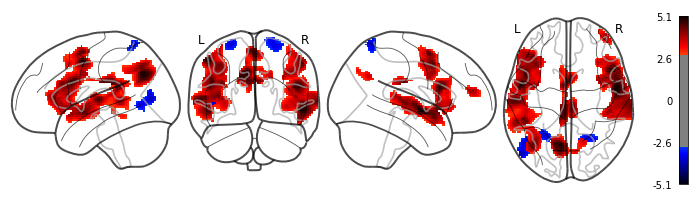

In [24]:
chinese_objRel_thresholded, chinese_objRel_threshold = threshold_stats_img(chinese_objRel_map, alpha=.05, 
                                                             height_control = 'fdr',
                                                             two_sided=True,
                                                             cluster_threshold=100)
print(chinese_objRel_threshold)

plotting.plot_glass_brain(chinese_objRel_thresholded,plot_abs=False, 
                          threshold = chinese_objRel_threshold,
                          display_mode='lyrz',
                          colorbar=True)

In [25]:
#chinese_objRel_thresholded.to_filename('second_level/chinese_objRel_thresholded.nii.gz')

In [26]:
table = get_clusters_table(stat_img = chinese_objRel_thresholded,
                           stat_threshold=chinese_objRel_threshold,
                           two_sided=True)

table = table.round({'X':0,'Y':0,'Z':0,'Peak Stat':2})
table.drop(columns=['Cluster ID'],inplace=True)
table=table[['Cluster Size (mm3)','X','Y','Z','Peak Stat']]
table

,Cluster Size (mm3),X,Y,Z,Peak Stat
0,25440,54.0,-2.0,-6.0,5.12
1,,48.0,18.0,22.0,4.83
2,,54.0,14.0,-4.0,4.40
3,,70.0,-24.0,4.0,4.33
4,44656,-52.0,2.0,52.0,5.02
5,,-48.0,10.0,28.0,4.76
6,,-60.0,-18.0,6.0,4.58
7,,-50.0,0.0,-8.0,4.53
8,5968,-8.0,-66.0,36.0,5.02
9,,18.0,-64.0,34.0,3.64


In [27]:
print(table.to_latex())

\begin{tabular}{llrrrr}
\toprule
{} & Cluster Size (mm3) &     X &     Y &     Z &  Peak Stat \\
\midrule
0  &              25440 &  54.0 &  -2.0 &  -6.0 &       5.12 \\
1  &                    &  48.0 &  18.0 &  22.0 &       4.83 \\
2  &                    &  54.0 &  14.0 &  -4.0 &       4.40 \\
3  &                    &  70.0 & -24.0 &   4.0 &       4.33 \\
4  &              44656 & -52.0 &   2.0 &  52.0 &       5.02 \\
5  &                    & -48.0 &  10.0 &  28.0 &       4.76 \\
6  &                    & -60.0 & -18.0 &   6.0 &       4.58 \\
7  &                    & -50.0 &   0.0 &  -8.0 &       4.53 \\
8  &               5968 &  -8.0 & -66.0 &  36.0 &       5.02 \\
9  &                    &  18.0 & -64.0 &  34.0 &       3.64 \\
10 &                    &   8.0 & -74.0 &  38.0 &       3.42 \\
11 &               2880 &  -6.0 & -30.0 &  26.0 &       4.64 \\
12 &                    &   4.0 & -24.0 &  26.0 &       4.28 \\
13 &               3240 &   0.0 &   4.0 &  58.0 &       4.61 \

## English

In [28]:
english_objRel_files = natsorted(glob.glob(f"/scratch/dgd45125/openNeuro_LPP/first_level_maps/english/*obj_rel*"))
design_matrix = pd.DataFrame([1] * len(english_objRel_files), columns=['intercept'])

english_objRel_model = SecondLevelModel(smoothing_fwhm=8.0,
                               mask_img = resampled_yeo_binary)
english_objRel_model = english_objRel_model.fit(english_objRel_files, design_matrix=design_matrix)

english_objRel_map = english_objRel_model.compute_contrast(output_type='z_score')

/home/dgd45125/.local/lib/python3.7/site-packages/nilearn/image/image.py:756: FutureWarning: Image data has type int64, which may cause incompatibilities with other tools. This will error in NiBabel 5.0. This warning can be silenced by passing the dtype argument to Nifti1Image().
  return klass(data, affine, header=header)


2.5946097389371614


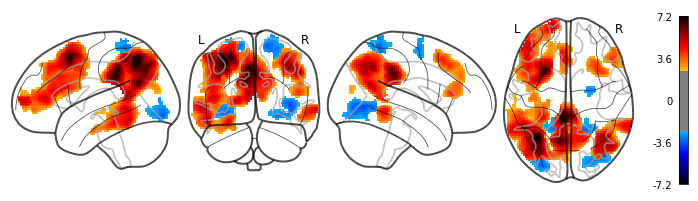

In [29]:
english_objRel_thresholded, english_objRel_threshold = threshold_stats_img(english_objRel_map,
                                                                           alpha=.05,
                                                                           height_control = 'fdr',
                                                                           two_sided=True,
                                                                           cluster_threshold=100)
print(english_objRel_threshold)

plotting.plot_glass_brain(english_objRel_thresholded,plot_abs=False, threshold = english_objRel_threshold,display_mode='lyrz',colorbar=True)

In [30]:
#english_objRel_thresholded.to_filename('second_level/english_objRel_thresholded.nii.gz')

In [31]:
table = get_clusters_table(stat_img = english_objRel_thresholded,
                   stat_threshold=english_objRel_threshold,
                   two_sided=True)
table = table.round({'X':0,'Y':0,'Z':0,'Peak Stat':2})
table.drop(columns=['Cluster ID'],inplace=True)
table=table[['Cluster Size (mm3)','X','Y','Z','Peak Stat']]
table

,Cluster Size (mm3),X,Y,Z,Peak Stat
0,79048,-34.0,-58.0,50.0,7.20
1,,-6.0,-38.0,40.0,6.85
2,,-10.0,-62.0,26.0,6.57
3,,-32.0,-68.0,40.0,6.34
4,46408,-26.0,16.0,52.0,6.66
5,,-34.0,22.0,46.0,5.24
6,,-18.0,66.0,6.0,5.13
7,,-44.0,44.0,8.0,5.08
8,16024,38.0,-58.0,42.0,5.73
9,,48.0,-68.0,36.0,5.48


In [32]:
print(table.to_latex())

\begin{tabular}{llrrrr}
\toprule
{} & Cluster Size (mm3) &     X &     Y &     Z &  Peak Stat \\
\midrule
0  &              79048 & -34.0 & -58.0 &  50.0 &       7.20 \\
1  &                    &  -6.0 & -38.0 &  40.0 &       6.85 \\
2  &                    & -10.0 & -62.0 &  26.0 &       6.57 \\
3  &                    & -32.0 & -68.0 &  40.0 &       6.34 \\
4  &              46408 & -26.0 &  16.0 &  52.0 &       6.66 \\
5  &                    & -34.0 &  22.0 &  46.0 &       5.24 \\
6  &                    & -18.0 &  66.0 &   6.0 &       5.13 \\
7  &                    & -44.0 &  44.0 &   8.0 &       5.08 \\
8  &              16024 &  38.0 & -58.0 &  42.0 &       5.73 \\
9  &                    &  48.0 & -68.0 &  36.0 &       5.48 \\
10 &              20480 & -54.0 & -50.0 & -18.0 &       5.23 \\
11 &                    & -60.0 & -48.0 &  -4.0 &       5.20 \\
12 &                    & -30.0 & -36.0 & -20.0 &       4.74 \\
13 &                    & -38.0 & -14.0 & -26.0 &       3.48 \

## Intersection

In [ ]:
masker = NiftiMasker(resampled_yeo_binary)

english_objRel_array = masker.fit_transform(english_objRel_map)
chinese_objRel_array = masker.fit_transform(chinese_objRel_map)

intersection = []

for i in range(len(english_objRel_array[0])):
    if (english_objRel_array[0][i] > 2.5946921807658945) and (chinese_objRel_array[0][i] > 2.812329944866934):
        intersection.append(1)
    elif (english_objRel_array[0][i] < -2.5946921807658945) and (chinese_objRel_array[0][i] < -2.812329944866934):
        intersection.append(-1)
         
        
    else:
        intersection.append(0.0)

objRel_overlap = masker.inverse_transform(intersection)

In [ ]:
plotting.plot_glass_brain(objRel_overlap,display_mode='lyrz',colorbar=True,plot_abs=False)

In [ ]:
table = get_clusters_table(stat_img = objRel_overlap,stat_threshold=0.2,two_sided=True)


table = table.round({'X':0,'Y':0,'Z':0,'Peak Stat':2})
table.drop(columns=['Cluster ID'],inplace=True)
table=table[['Cluster Size (mm3)','X','Y','Z','Peak Stat']]
#table = table.drop(columns='Peak Stat')
table

In [ ]:
print(table.to_latex())

In [59]:
objRel_overlap.to_filename('second_level/objRel_overlap.nii.gz')